In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from pydoc import help 

import pandas as pd


import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import scale

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

from IPython.display import display, HTML

In [4]:
%matplotlib inline

In [5]:
np.set_printoptions(suppress=True)
MAX_ROWS=20
pd.set_option('display.max_rows',MAX_ROWS)
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]

In [7]:
data.V1 = data.V1.astype(str)
x = data.loc[:, "V2":]  # independent variables data​
y = data.V1  # dependednt variable data​

In [8]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
x

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: V1, Length: 178, dtype: object

In [11]:
data.loc[:,"V2":"V6"]

,V2,V3,V4,V5,V6
0,14.23,1.71,2.43,15.6,127
1,13.20,1.78,2.14,11.2,100
2,13.16,2.36,2.67,18.6,101
3,14.37,1.95,2.50,16.8,113
4,13.24,2.59,2.87,21.0,118
...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95
174,13.40,3.91,2.48,23.0,102
175,13.27,4.28,2.26,20.0,120
176,13.17,2.59,2.37,20.0,120


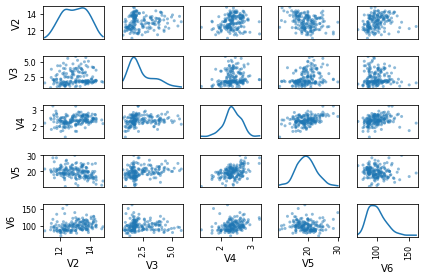

In [12]:
pd.plotting.scatter_matrix(data.loc[:,"V2":"V6"],diagonal='kde')
plt.tight_layout()
plt.show()

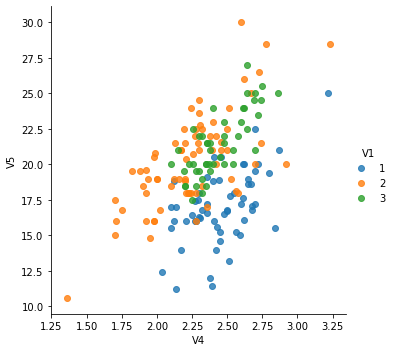

In [13]:
sns.lmplot("V4", "V5", data, hue="V1", fit_reg=False)

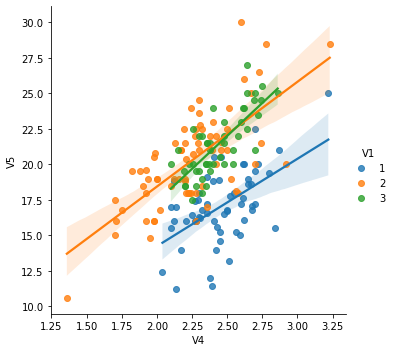

In [14]:
sns.lmplot("V4", "V5", data, hue="V1", fit_reg=True)

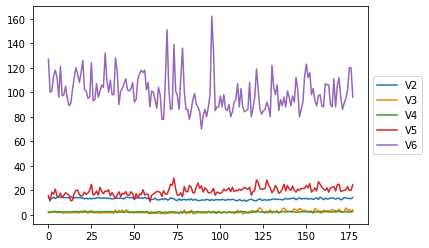

In [15]:
ax=data[["V2","V3","V4","V5","V6"]].plot()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
x.apply(np.mean)

V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

In [17]:
x.apply(np.std)

V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64

In [18]:
def calcWithinGroupsVariance(variable, groupvariable):



    levels = sorted(set(groupvariable))

    numlevels = len(levels)



    numtotal = 0

    denomtotal = 0

    for leveli in levels:

        levelidata = variable[groupvariable==leveli]

        levelilength = len(levelidata)

        # get the standard deviation for group i:

        sdi = np.std(levelidata)

        numi = (levelilength)*sdi**2

        denomi = levelilength

        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi

    # calculate the within-groups variance

    Vw = numtotal / (denomtotal - numlevels)

    return Vw

In [19]:
calcWithinGroupsVariance(x.V2, y)

0.2620524691539065

In [20]:
def calcBetweenGroupsVariance(variable, groupvariable):

    # find out how many values the group variable can take

    levels = sorted(set((groupvariable)))

    numlevels = len(levels)

    # calculate the overall grand mean:

    grandmean = np.mean(variable)

    # get the mean and standard deviation for each group:

    numtotal = 0

    denomtotal = 0

    for leveli in levels:

        levelidata = variable[groupvariable==leveli]

        levelilength = len(levelidata)

        # get the mean and standard deviation for group i:

        meani = np.mean(levelidata)

        sdi = np.std(levelidata)

        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength

        numtotal = numtotal + numi

        denomtotal = denomtotal + denomi

    # calculate the between-groups variance

    Vb = numtotal / (numlevels - 1)

    return(Vb)

In [21]:
calcBetweenGroupsVariance(x.V2, y)

35.397424960269106

In [25]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):

    levels = sorted(set(groupvariable))

    numlevels = len(levels)

    Covw = 0.0

    # get the covariance of variable 1 and variable 2 for each group:

    for leveli in levels:

        levelidata1 = variable1[groupvariable==leveli]

        levelidata2 = variable2[groupvariable==leveli]

        mean1 = np.mean(levelidata1)

        mean2 = np.mean(levelidata2)

        levelilength = len(levelidata1)

        # get the covariance for this group:

        term1 = 0.0

        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):

            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)

        Cov_groupi = term1 # covariance for this group

        Covw += Cov_groupi

    totallength = len(variable1)
    Covw /= totallength - numlevels

    return Covw

In [26]:
calcWithinGroupsCovariance(x.V8, x.V11, y)

0.28667830215140183

In [27]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):

    # find out how many values the group variable can take

    levels = sorted(set(groupvariable))

    numlevels = len(levels)

    # calculate the grand means

    variable1mean = np.mean(variable1)

    variable2mean = np.mean(variable2)

    # calculate the between-groups covariance

    Covb = 0.0

    for leveli in levels:

        levelidata1 = variable1[groupvariable==leveli]

        levelidata2 = variable2[groupvariable==leveli]

        mean1 = np.mean(levelidata1)

        mean2 = np.mean(levelidata2)

        levelilength = len(levelidata1)

        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength

        Covb += term1

    Covb /= numlevels - 1
    return Covb

In [28]:
corr = stats.pearsonr(x.V2, x.V3)

print("p-value:\t", corr[1])

print("cor:\t\t", corr[0])

p-value:	 0.21008198597072283
cor:		 0.09439694091041398


In [29]:
corrmat = x.corr()

corrmat

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V2,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
V3,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
V4,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
V5,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
V6,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
V7,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
V8,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
V9,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
V10,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
V11,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


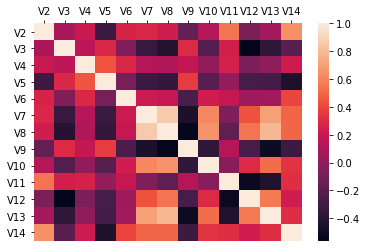

In [30]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

13


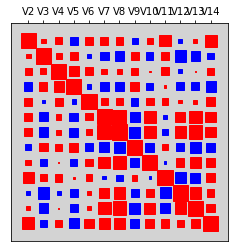

In [41]:
def hinton(matrix, max_weight=None, ax=None):

    """Draw Hinton diagram for visualizing a weight matrix."""

    ax = ax if ax is not None else plt.gca()



    if not max_weight:

        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))



    ax.patch.set_facecolor('lightgray')

    ax.set_aspect('equal', 'box')

    ax.xaxis.set_major_locator(plt.NullLocator())

    ax.yaxis.set_major_locator(plt.NullLocator())



    for (x, y), w in np.ndenumerate(matrix):

        color ='red' if w > 0 else 'blue'

        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,

                             facecolor=color, edgecolor=color)

        ax.add_patch(rect)



    nticks = matrix.shape[0]
    print(nticks)

    ax.xaxis.tick_top()

    ax.set_xticks(range(nticks)) 
    ax.set_xticklabels(matrix.columns)
    ax.grid(False) 
    ax.autoscale_view() 
    ax.invert_yaxis() 
    
hinton(corrmat)

In [42]:
def mosthighlycorrelated(mydataframe, numtoreport):

    # find the correlations

    cormatrix = mydataframe.corr()

    # set the correlations on the diagonal or lower triangle to zero,

    # so they will not be reported as the highest ones:

    cormatrix *= np.tri(*cormatrix.values.shape, k=-1)

    # find the top n correlations

    cormatrix = cormatrix.stack()

    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()

    # assign human-friendly names

    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]

    return cormatrix.head(numtoreport)

In [44]:
mosthighlycorrelated(x, 10)

,FirstVariable,SecondVariable,Correlation
0,V8,V7,0.864564
1,V13,V8,0.787194
2,V13,V7,0.699949
3,V10,V8,0.652692
4,V14,V2,0.643720
5,V10,V7,0.612413
6,V13,V12,0.565468
7,V12,V3,-0.561296
8,V11,V2,0.546364
9,V12,V8,0.543479


In [48]:
from sklearn.preprocessing import StandardScaler
standardisedX = scale(x)

standardisedX = pd.DataFrame(standardisedX, index=x.index, columns=x.columns)
standardisedX.apply(np.mean)


V2    -8.619821e-16
V3    -8.357859e-17
V4    -8.657245e-16
V5    -1.160121e-16
V6    -1.995907e-17
V7    -2.972030e-16
V8    -4.016762e-16
V9     4.079134e-16
V10   -1.699639e-16
V11   -1.247442e-18
V12    3.717376e-16
V13    2.919013e-16
V14   -7.484650e-18
dtype: float64

In [49]:
standardisedX.apply(np.std)

V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
dtype: float64